In [1]:
## MPS Test, fix config, variable replicas with SM=12%，GPU Limit=1.0
## Client vus = 20
import pandas as pd
import json

def getDFfromCSV(file):
    csv = pd.read_csv(file)
    replica, gpu_util, copy_util, sm_active, sm_occu, rps, p95 =[], [], [], [], [], [], []
    for index, row in csv.iterrows():
        limit_json = json.loads(row["limitations"])
        metrics_json = json.loads(row["other_metrics"])

        replica.append(int(limit_json['replicas']))
        gpu_util.append(float(metrics_json['DCGM_FI_DEV_GPU_UTIL']))
        copy_util.append(float(metrics_json['DCGM_FI_DEV_MEM_COPY_UTIL']))
        sm_active.append(float(metrics_json['DCGM_FI_PROF_SM_ACTIVE'])*100)
        sm_occu.append(float(metrics_json['DCGM_FI_PROF_SM_OCCUPANCY'])*100)
        p95.append(float(metrics_json['p95']))
        rps.append(float(row["value"]))
    dfdata = pd.DataFrame({'replica':replica, 'rps':rps, 'p95':p95, 'gpu_util':gpu_util, 'copy_util':copy_util, 'sm_active':sm_active, 'sm_occu':sm_occu})
    # dfdata = dfdata.groupby(['replica']).agg({'rps': 'max'}).reset_index()
    idx = dfdata.groupby(['replica'])['rps'].idxmax()
    dfdata = dfdata.loc[idx]
    # df = df[df.z != -1]
    return dfdata
# mps50 = getDFfromCSV('mps50rsnt.csv')
# mps24 = getDFfromCSV('mps24rsnt.csv')
# mps12 = getDFfromCSV('mpsrsnt4.csv')
# nm = getDFfromCSV('nm-rsnt4.csv')

# mps24 = getDFfromCSV('mps24rnnt.csv')
# mps12 = getDFfromCSV('mps12rnnt.csv')
# nm = getDFfromCSV('nm-12rnnt.csv')

mps24 = getDFfromCSV('mps24gnmt.csv')
mps12 = getDFfromCSV('mps12gnmt.csv')
nm = getDFfromCSV('nm-24gnmt.csv')

# print(mps24)
print(mps24)
print(nm)
# mps50['type'] = 'mps-50%'
mps24['type'] = 'mps-24%'
mps12['type'] = 'mps-12%'
nm['type'] = 'racing'

# Concatenate the two dataframes together
df_combined = pd.concat([mps24, mps12, nm], ignore_index=True)


   replica        rps    p95  gpu_util  copy_util  sm_active  sm_occu
0        1  15.696385  680.0      82.0       19.0    12.0681   4.2776
1        3  36.816713  320.0      96.0       38.0    27.6050   9.7334
2        5  45.090611  290.0      97.0       48.0    35.7713  12.6889
3        7  53.755856  230.0      98.0       56.0    43.1370  15.3869
6        9  50.232824  270.0      98.0       53.0    39.0408  13.9044
   replica        rps    p95  gpu_util  copy_util  sm_active  sm_occu
0        1  19.998212  610.0      64.0       26.0    23.7203   6.9376
1        3  29.635591  370.0      95.0       29.0    29.3229   8.6641
2        5  29.454224  380.0      96.0       29.0    28.6830   8.3623
3        7  29.049372  370.0      96.0       28.0    28.2672   8.3448
4        9  28.980675  390.0      96.0       28.0    28.1528   8.2369


Text(0.5, 0.98, 'MPS Performance and Overhead Test')

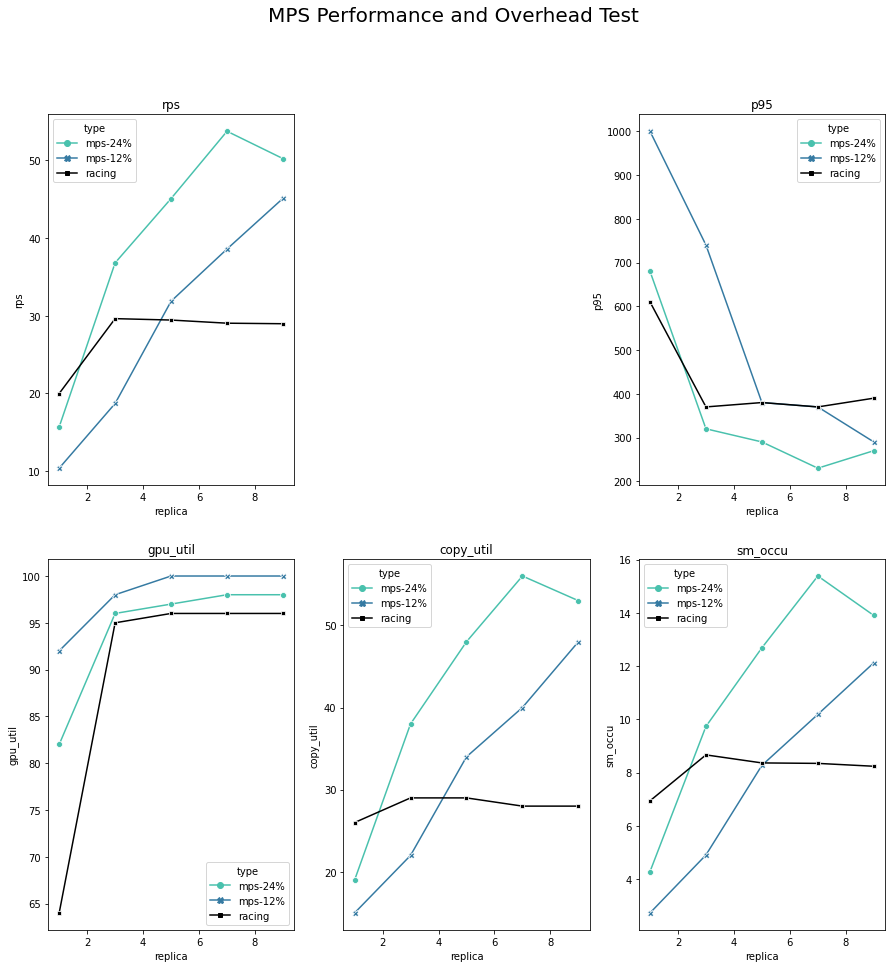

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("mako_r", 3)
palette[-1] = "#000000"
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.flatten()
idxMap = {"rps":0, "p95":2, "gpu_util":3, "copy_util":4, "sm_occu":5, "sm_active":1}
for i, col in enumerate(df_combined.columns[:-1]):
    if (col != "replica") & (col != "type") & (col != "sm_active"):
        g = sns.lineplot(x='replica', y=col, hue='type', data=df_combined, style="type",
             markers=True, dashes=False,
             palette=palette,
             ax=axes[idxMap[col]]
             )
        axes[idxMap[col]].set_title(col)
axes[1].axis('off')
fig.suptitle("MPS Performance and Overhead Test", fontsize=20)

In [3]:
g.figure.savefig("mps-gnmt.svg", format="svg")
